In [8]:
import os
from slugify import slugify

def retrive_file_name(file_name):
    # get only the file name
    return file_name.split("\\")[-1].split("/")[-1].split(".")[0]

def get_slugify(file_name):
    # clean up the file name and also replace w -> with
    new_file_name = slugify(retrive_file_name(file_name))#.replace("-w-", "-with-")
    # get the episode number
    ep_number = new_file_name.split("-")[2]
    return new_file_name, ep_number

def create_output_path(output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    return output_path

create_output_path("episodes")

'episodes'

### Step 2.1: Rename downloaded files (cleaning up titles) and put in a subdirectory for cleaned up titles for both caption and full_text files
from file cleaning-titles.ipynb

In [16]:
import unicodedata
import re
import glob
import shutil

def create_clean_title(main_dir, extension=".vtt"):
    output_dir = create_output_path(main_dir+"clean/")
        
    for file_name in glob.glob(r'{}*{}'.format(main_dir, extension)):
        new_file_name, ep_number = get_slugify(file_name)
        dest = output_dir+new_file_name+extension
        shutil.copy2(file_name, dest)
    print("==================================================")
    print("DONE: CREATED CLEAN FILES IN ", output_dir)
    print("==================================================")

create_clean_title(main_dir="captions/", extension= ".vtt")
create_clean_title(main_dir="full_text/", extension= ".txt")

DONE: CREATED CLEAN FILES IN  captions/clean/
DONE: CREATED CLEAN FILES IN  full_text/clean/


### Step 2.2: For captions: Take in renamed files from previous step and clean their contents up by removing empty spaces and make it into one single line for time and what was said
from combine_lines_from combine_lines_from_cleaned.ipynb

In [18]:
import glob
import os

dic = {}
paths_to_files = "./captions/clean/"
output_path = create_output_path("episodes/captions/")

def create_clean_caption_files():
    for file_path in glob.glob(paths_to_files+"*.vtt"):
        # get the episode number
        file_number = file_path.split("/")[-1].split("-")[2]
        # add file contents to a dict
        with open(file_path) as f:
            arr = []
            for word in f.read().strip().split("\n\n")[1:]:
                arr.append(word.split("\n", 1)[1].replace("\n", " "))
            ## add this to file with correct episode number
            text_file = open(output_path+"/"+file_number+".txt", "w")
            text_file.write("\n".join(arr))
            text_file.close()
            dic[file_number] = arr
            
create_clean_caption_files()        

### Step 3: Create hyperlinks to each episode for the React website
from create_hrefs.ipynb

In [19]:
import unicodedata
import re
import glob
import shutil
from slugify import slugify
import os

def create_hrefs(main_dir="./captions/", extension=".vtt"):
      arr = []
      dic = {}
      # iterate through all files with extension (.vtt)
      for file_name in glob.glob(r'{}*{}'.format(main_dir, extension)):
            # clean up the file name and also replace w -> with
            new_file_name = slugify(file_name.split("\\")[-1].split("/")[-1].split(".")[0]).replace("-w-", "-with-")
            # get the episode number
            ep_number = new_file_name.split("-")[2]
            # our new title which has been cleaned up
            new_title = "Jocko Podcast Episode #" + ep_number+ " - " + " ".join(new_file_name.split("-")[3:])
            # save a href link to a dictionary
            dic[int(ep_number)] = "<a href='episode/"+ep_number+"'>"+new_title+"</a>"

      # have to sort the dictionary since items are not in order
      for k, v in dict(sorted(dic.items())).items():
            # save href to array in correct order
            arr.append(v)
      # add this to a single file with all links to episodes
      text_file = open("episodes/hrefs.txt", "w")
      text_file.write("\n".join(arr))
      text_file.close()
    
create_hrefs()

### Create title files

In [21]:
import unicodedata
import re
import glob
import shutil
from slugify import slugify
import os

output_path = create_output_path("episodes/titles")

def create_title_files(main_dir="./full_text/", extension=".txt"):
      arr = []
      dic = {}
      # iterate through all files with extension (.vtt)
      for file_name in glob.glob(r'{}*{}'.format(main_dir, extension)):
            new_file_name, ep_number = get_slugify(file_name)
            # our new title which has been cleaned up
            new_title = "Jocko Podcast Episode #" + ep_number+ " - " + " ".join(new_file_name.split("-")[3:])
            # add this to file with correct episode number
            text_file = open(output_path+"/"+ep_number+".txt", "w")
            text_file.write(new_title)
            text_file.close()

create_title_files()

### Create links to original video

In [22]:
import unicodedata
import re
import glob
import shutil
from slugify import slugify
import os

output_path = create_output_path("episodes/links")

def create_link_to_youtube_episode(main_dir="./full_text/", extension= ".txt"):
      arr = []
      dic = {}
      # iterate through all files with extension (.vtt)
      for file_name in glob.glob(r'{}*{}'.format(main_dir, extension)):
            new_file_name, ep_number = get_slugify(file_name)
            # our new title which has been cleaned up
            new_title = "<a href=''><img src=''></a>"
            # # add this to file with correct episode number
            text_file = open(output_path+"/"+ep_number+".txt", "w")
            text_file.write(new_title)
            text_file.close()

## only uncomment if you are absolutely sure since this replaces manual edits
# create_link_to_youtube_episode()

### Step 4: Summarize text

In [9]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

f = open("full_text/Jocko Podcast #1 - With Echo Charles ｜ Leadership, Ownership, Mental Toughness.txt", "r").read()

stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')

doc = nlp(f)
tokens = [token.text for token in doc] #x

punctuation = punctuation + '\n' #x

word_frequencies = {} #x
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

cloud_word_frequencies = word_frequencies.copy()

max_frequency = max(word_frequencies.values()) #x

for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency #x

sentence_tokens = [sent for sent in doc.sents] #x

sentence_scores = {} #x
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]

from heapq import nlargest
select_length = int(len(sentence_tokens)*0.03) #x

summary = nlargest(select_length, sentence_scores, key = sentence_scores.get) #x

final_summary = [word.text for word in summary]

summary = ' '.join(final_summary) #x

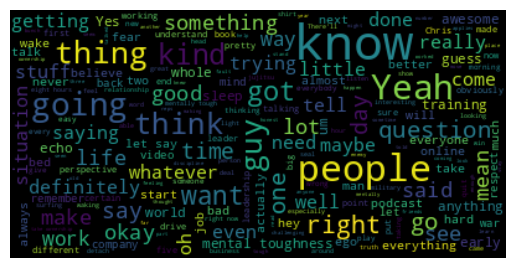

In [13]:
import os
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = " ".join([(k + " ")*v for k,v in cloud_word_frequencies.items()])
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(f)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
image = wordcloud.to_image()
filepath = "./episode_links/"+1+".jpg"
image.save(filepath)

In [31]:
sorted(word_frequencies.items(), key=lambda x:x[1], reverse=True)

[('know', 1.0),
 ('like', 0.6535087719298246),
 ('people', 0.4649122807017544),
 ('going', 0.37280701754385964),
 ('Yeah', 0.33771929824561403),
 ('think', 0.31140350877192985),
 ('kind', 0.2675438596491228),
 ('got', 0.2543859649122807),
 ('want', 0.2324561403508772),
 ('things', 0.2149122807017544),
 ('right', 0.19298245614035087),
 ('guy', 0.17105263157894737),
 ('guys', 0.14912280701754385),
 ('lot', 0.14035087719298245),
 ('thing', 0.14035087719298245),
 ('good', 0.13596491228070176),
 ('said', 0.13596491228070176),
 ('life', 0.13596491228070176),
 ('time', 0.13157894736842105),
 ('mean', 0.11403508771929824),
 ('day', 0.10964912280701754),
 ('question', 0.10526315789473684),
 ('way', 0.10526315789473684),
 ('work', 0.10087719298245613),
 ('little', 0.10087719298245613),
 ('mental', 0.09649122807017543),
 ('world', 0.08771929824561403),
 ('questions', 0.08333333333333333),
 ('yeah', 0.08333333333333333),
 ('okay', 0.08333333333333333),
 ('mentally', 0.08333333333333333),
 ('let', 

In [17]:
select_length

34

In [11]:
print(summary)

And what's interesting is that, like surfing and playing guitar, like that's not easy, you know, it's not, I mean, I'm not going to, I'm not going to talk about golf, but golf is seems like, oh, hey, you just go out and play golf and show some people they get good and great, you know, and it is fun and stuff, but it's not like surfing, you know, and surfing is fun you know what the right thing to do is you know what it is you know it's be disciplined you know it's work hard you know it's put your ego and check you know these things you just got to do you just got to do I think we're close that And I don't want people to think that I sit around and brood all day about the darkness, you know, because I don't, you know, I mean, I love that a good time and laughing and, you know, smile and I want to do that, you know. I say everyone's in a while, uh, you'll hear people going, man, like this country is going like violence or whatever, you know, like going down the jitter or all this stuff. 